In [140]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
Df= pd.read_csv('hotel_bookings.csv')
Df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [142]:
## menghapus features yang tidak digunakan untuk Machine Learning
df1=Df.drop(['lead_time', 'arrival_date_year',  'arrival_date_month',	'arrival_date_week_number',	'arrival_date_day_of_month'	,'stays_in_weekend_nights',	'stays_in_week_nights', 'is_repeated_guest', 	'previous_cancellations', 'previous_bookings_not_canceled', 'agent',	'company',	'adr', 'reservation_status', 'reservation_status_date'], axis=1)   

# EDA

In [143]:
# mengecek type data seluruh kolom
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  assigned_room_type           119390 non-null  object 
 11  booking_changes              119390 non-null  int64  
 12  deposit_type                 119390 non-null  object 
 13 

### ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [144]:
# mengecek apakah terdapat missing value dalam dataset
df1.isna().sum()

hotel                            0
is_canceled                      0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

In [145]:
df1['country'].fillna(str(df1['country'].mode().values[0]),inplace=True)
df1['children'].fillna(str(df1['children'].mean()),inplace=True)
## mengisi missing value pada feature country dengan negara yang paling sering muncul & pada feature children dengan rata2

In [146]:
df1.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [121]:
## melihat distribusi nilai dalam dataframe
df1.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,119390,119390.000000,119390.000000,119390.0,119390.000000,119390,119390,119390,119390,119390,119390,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000
unique,2,NaN,NaN,6.0,NaN,5,177,8,5,10,12,NaN,3,NaN,4,NaN,NaN
top,City Hotel,NaN,NaN,0.0,NaN,BB,PRT,Online TA,TA/TO,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,79330,NaN,NaN,110796.0,NaN,92310,49078,56477,97870,85994,74053,NaN,104641,NaN,89613,NaN,NaN
mean,NaN,0.370416,1.856403,NaN,0.007949,NaN,NaN,NaN,NaN,NaN,NaN,0.221124,NaN,2.321149,NaN,0.062518,0.571363
std,NaN,0.482918,0.579261,NaN,0.097436,NaN,NaN,NaN,NaN,NaN,NaN,0.652306,NaN,17.594721,NaN,0.245291,0.792798
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
50%,NaN,0.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
75%,NaN,1.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.000000


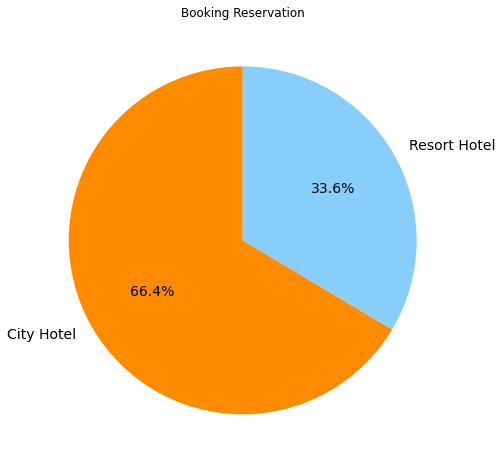

In [126]:
# parameter diagram pie
plt.rcParams['figure.figsize'] = 8,8
colors = ["darkorange","lightskyblue"]

# mendefinisikan labels & size and memasukkan kedalam list 
labels = df1['hotel'].value_counts().index.tolist() #index dalam feature hotel
sizes = df1['hotel'].value_counts().tolist()  # jumlah frekuensi kemunculan dalam feature hotel

# plotting diagram pie
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Booking Reservation')
plt.show()

### berdasarkan diagram pie diatas, dapat dilihat bahwa masyarakat/orang2 lebih memilih hotel-hotel yang berada di tengah/pusat kota dengan tingkat reservasi yang cukup tinggi, sekitar 66% dari total reservasi, jauh lebih besar jika dibandingkan dgn reservasi hotel resort dgn pemandangan alam.

In [137]:
## mengubah data dari dummy variable menjadi definitif, yaitu 'canceled' dan 'not canceled'
df1['is_canceled'] = df1.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])

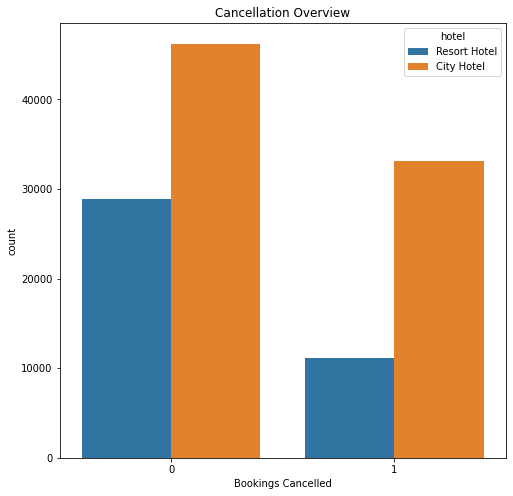

In [148]:
sns.countplot(x='is_canceled', data=df1, hue='hotel')
plt.xlabel("Bookings Cancelled")
plt.title("Cancellation Overview")
plt.show()

### Dapat dilihat bahwa reservasi di area resort memiliki historis pembatalan yang lebih rendah dibandingkan dengan hotel di pusat kota.
### Meskipun begitu, hotel di tengah kota  memiliki historis pembatalan yg lebih tinggi (Cancelled Book City Hotel) dengan reservasi di resort hotel (Not cancelled Resort Hotel).
### Dengan begitu, masyarakat/wisatawan lebih cenderung membatalkan booking ketika menginap di hotel-hotel tengah kota.

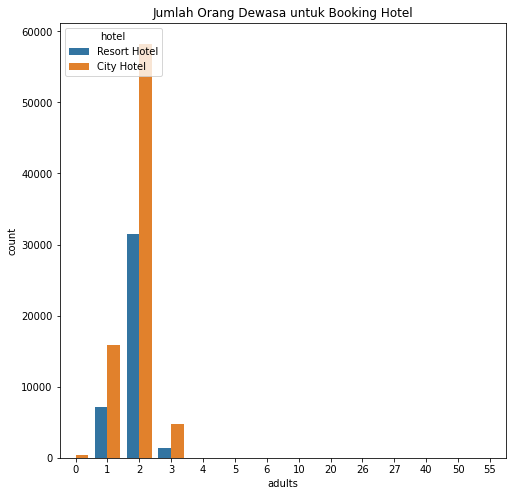

In [152]:
sns.countplot(data=df1, x='adults',hue='hotel')
plt.title("Jumlah Orang Dewasa untuk Booking Hotel")
plt.show()


### jumlah orang dewasa yang dibawa/didaftarkan  ketika berpergian/menginap di city hotel lebih banyak dibanding wisatawan yang menginap di resort hotel.

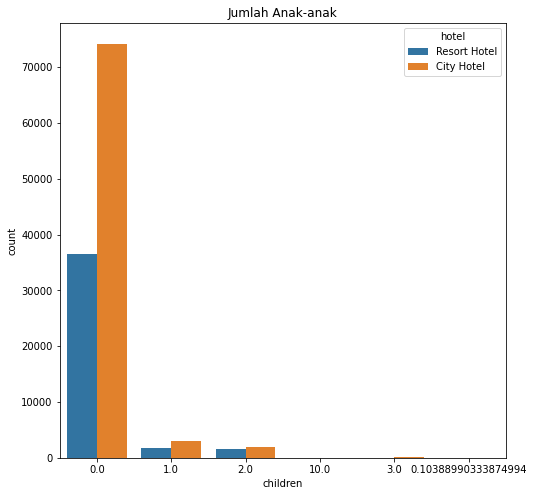

In [150]:
sns.countplot(data=df1, x='children', hue='hotel')
plt.title("Jumlah Anak-anak")
plt.show()

### jumlah anak-anak yang dibawa ketika berpergian/menginap di city hotel lebih banyak dibanding wisatawan yang menginap di resort hotel.

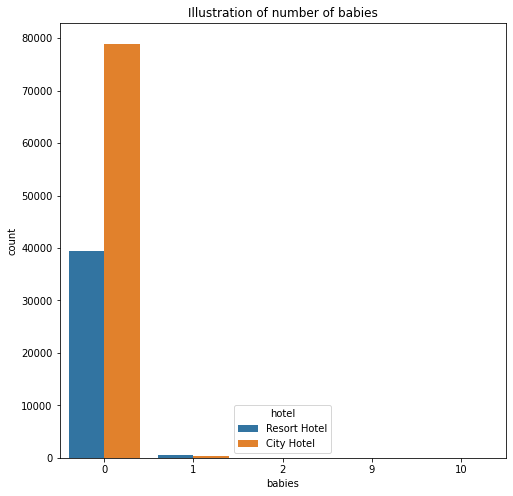

In [149]:
sns.countplot(data=df1, x='babies', hue='hotel')
plt.title("Jumlah Bayi")
plt.show()

### jumlah bayi yang dibawa ketika berpergian/menginap di resort hotel lebih banyak dibanding wisatawan yang menginap di city hotel.

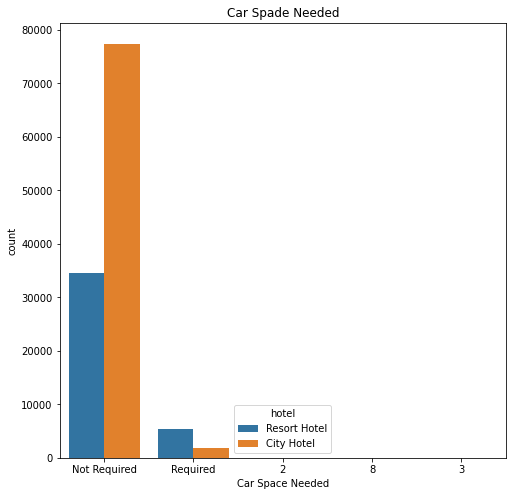

In [154]:
df1['required_car_parking_spaces'] = df1.required_car_parking_spaces.replace([1,0],["Required","Not Required"])
sns.countplot(x='required_car_parking_spaces', data=df1, hue='hotel')
plt.xlabel("Car Space Needed")
plt.title("Car Spade Needed")
plt.show()

In [155]:
### Lebih banyak orang2/wisatawan yang membutuhkan lahan parkir ketika menginap di resort hotel dibandingkan city hotel

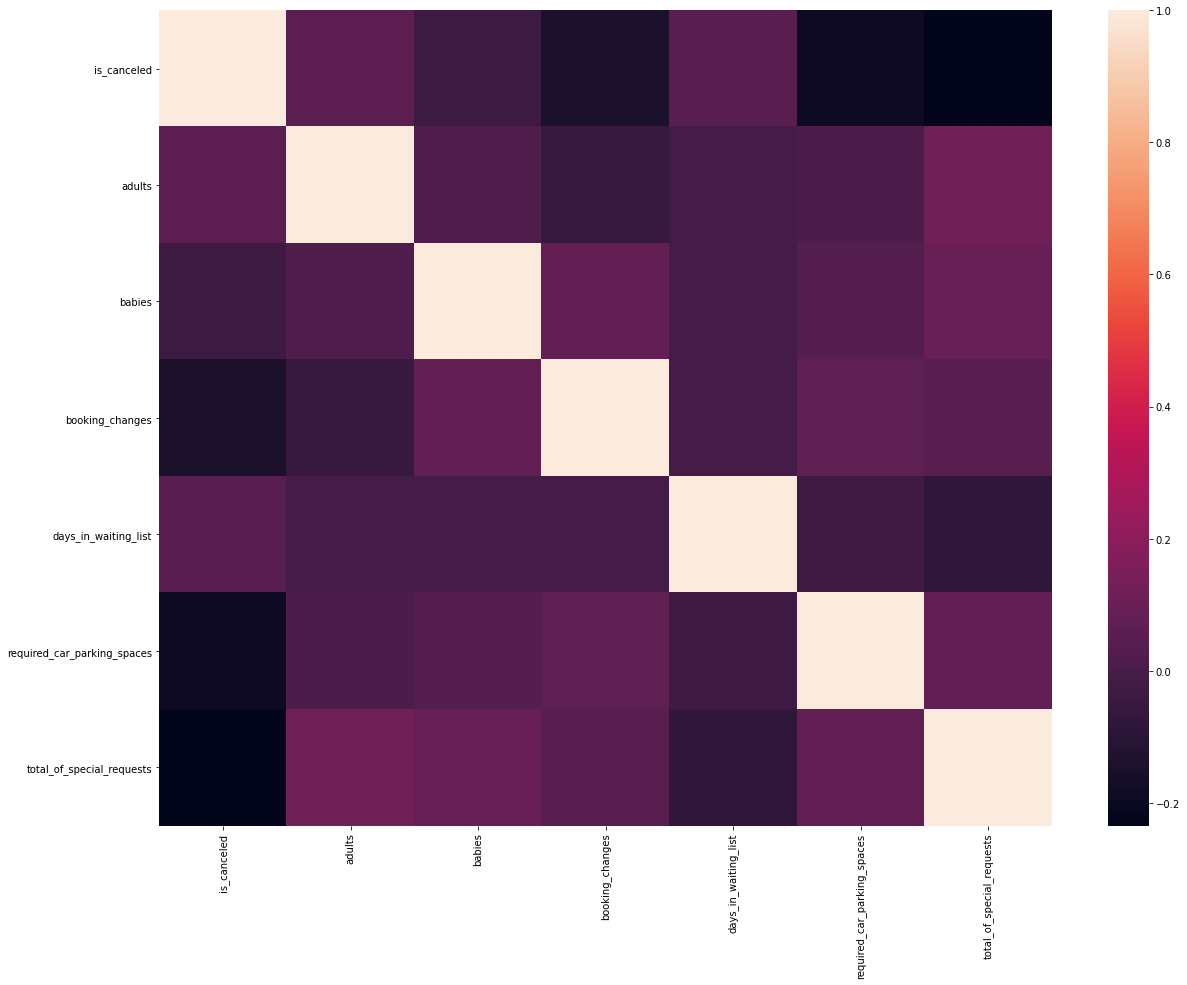

In [122]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(df1.corr())

### 
- dari data diatas dapat dilihat bahwa tidak ada multicolinearity
- feature yang memiliki korelasi tertinggi dengan fitur 'is_Canceled' adalah 'days_in_waiting list', yaitu jumlah hari ketika masuk ke daftar waiting list (Warna ungu terang). Selain itu, jumlah orang dewasa yang melakukan/didaftarkan ke booking hotel (reservasi) juga mempengaruhi batalnya booking pada beberapa kasus (Warna ungu agak terang).

# Data Cleansing & Pre-Processing

In [10]:
# mencari jumlah missing value di masing-masing features
# jumlah missing value sudah stabil/ dapat dikatakan cukup bersih
df1.isna().sum()/df1.shape[0]*100

hotel                          0.000000
is_canceled                    0.000000
adults                         0.000000
children                       0.003350
babies                         0.000000
meal                           0.000000
country                        0.408744
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
assigned_room_type             0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
dtype: float64

### ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [81]:
# library untuk pre-processing

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [167]:
# terdapat error ketika melakukan klasifikasi RandomForest, karena could not convert string to float
# perlu mengubah semua features kategorikal menjadi dummy variables
df_dummy=pd.get_dummies(df1,columns=['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'])

In [168]:
#  Pipeline digunakan untuk menyatukan beberapa step sehingga Cross-Validation akan tetap bisa berjalan saat beberapa parameter diubah serta menghindari data/information leakage dan output diluar target processing.

onehot_fill=Pipeline([
    ('fillna',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(drop='first'))
])

transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['hotel','adults', 'children', 'babies', 'meal',  'market_segment', 'distribution_channel', 'booking_changes', 'reserved_room_type', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']),
    ('onehot_fill', onehot_fill, ['country']),
    ('fill_children', SimpleImputer(strategy='mean'),['children']), 
], remainder='passthrough')

# Menggunakan column transformer untuk melakukan Encoding One Hot --> hampir seluruh data merupakan data nominal dengan tipe kategori yang tidak terlalu byk
# menggunakan binary encoder untuk feature 'reserved_room_type' karena terdapat berbagai macam type reservasi (A-G) sehingga harus dikelompokkan menjadi data biner
## menggunakan Pipeline utk feature 'country' agar tidak ada leakage, karena masih terdapat missing value dan ingin diisi dengan 'Simple Imputer' negara yang paling sering muncul 
## Juga dengan feature children, namun Mising value diisi dengan rata2 jumlah children

>* hotel --> **onehot**, binary
>* adults --> **onehot**, ordinal
>* children --> (isi missing value) binary, **onehot**
>* babies --> **onehot**, binary
>* meal --> **onehot**, binary
>* country --> **onehot**, binary
>* market segment --> **onehot**, binary
>* distribution_channel --> **onehot**, binary
>* reserved_room_type --> onehot, **binary**
>* booking_changes --> **onehot**, binary
>* deposit_type --> **onehot**, binary
>* days_in_waiting_list --> **onehot**, binary
>* customer_type --> **onehot**, binary
>* required_car_parking_spaces --> **onehot**, binary
>* total_of_special_requests --> **onehot**, binary

## Splitting Data

In [169]:
from sklearn.model_selection import train_test_split

In [185]:
# memisahkan fitur yang digunakan sebagai kisi2 pembelajaran Machine Learning
X=df_dummy.drop('is_canceled',axis=1)
y= df_dummy['is_canceled']

In [186]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=0.3,
    stratify=y,
    random_state=2020)
# menggunakan test size 30% dan data training 70% dari total data

In [187]:
X_train_preprocessed= transformer.fit_transform(X_train) # fitting AND transforming X_train
X_test_preprocessed= transformer.transform(X_test) # transform X test, tdk perlu fit  karena sudah belajar sebelumnya

ValueError: A given column is not a column of the dataframe

# Model Benchmark & Evaluation

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [173]:
models = [
    ['Log Regression', LogisticRegression()],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier()]]

In [174]:
def evaluate(models):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name, model in models:
        estimator=Pipeline([('preprocess',transformer),('model',model)])

        skfold= StratifiedKFold(n_splits=5)

        model_name.append(name)
        f1_score.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='f1').mean())
        f1_std.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='f1').std())

    return pd.DataFrame({
        'model': model_name,
        'f1_score':f1_score,
        'f1_std':f1_std
        })

In [175]:
evaluate(models)

,model,f1_score,f1_std
0,Log Regression,NaN,NaN
1,DecisionTree,NaN,NaN
2,RandomForest,NaN,NaN
3,KNeighbours,NaN,NaN


In [189]:
model_HB = RandomForestClassifier(n_estimators=400)
model_HB.fit(X_train, y_train)
# melakukan fitting model RandomForest terhadap X_TRAIN & Y_TRAIN
## namun terdapat error yang menghasilkan [could not convert string to float: 'A'] meskipun sudah diubah menjadi data dummy (besar kemungkinan dari features 'reserved_room_type' )

ValueError: could not convert string to float: 'A'

In [110]:
y_pred = model_HB.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
accuracy_score(y_test,y_pred)
# mengecek tingkat akurasi y hasil prediksi terhadap y_test

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
#mengecek benchmark performance terhadap test data
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
estimator.fit(X_train,y_train)
f1_score(y_test, estimator.predict(X_test))

# Hyper-parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [188]:
hyperparam_space = {
        # 'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}

### min samples leaf digunakan untuk mengatur jumlah leaf node minimum yg dibutuhkan 
### min sample split adalah jumlah data minimum / batas ambang yang dibutuhkan untuk tidak memecah lagi pada klasifikasi machine learning.
### model__max_depth = jumlah tingkat/level klasifikasi pada tree clasifier.

In [47]:
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)
# melakukan Cross-validation dengan 'StratifiedKFold' sebanyak 5 kali. Tetap menggunakan Pipeline agar tidak ada leakage dengan transformer dan model RandomForest. Bertujuan untuk menghasilkan train/test indices to split data in train/test sets.

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [ ]:
# grid.best_params_

In [ ]:
grid.best_score_ 

In [ ]:
# evaluasi best estimator ke test data

grid.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid.best_estimator_.predict(X_test))

# score turun, tanpa hyperparameter tunning lebih baik

# coba dengan parameter lain
# coba dengan model lain

In [ ]:
# save model

import pickle

estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
model_final=estimator.fit(X_train,y_train)

pickle.dump(model_final,open('final_model.sav','wb'))

In [ ]:
#simpan hasil tunning

import pickle

model_final=grid.best_estimator_.fit(X_train,y_train)

pickle.dump(model_final,open('final_tunning.sav','wb'))